# Microsoft Film Project Data Analytics 

In [1]:
#import all my packages 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv


In [2]:
#called in my location before loading my file 
%pwd

'C:\\Users\\stefano caruso\\Documents\\flatiron\\dsc-phase-1-project-database\\zippedData'

# Overview

# Data Understandin 

# Business Problem

# Importing files to view Data frames



In [3]:
#read in csv to anaylze and brief view 
movie = pd.read_csv('tmdb.movies.csv.gz', )
movie.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [4]:
#read in csv to anaylze and brief view which is the most useful dataset because of the gross and budget data 
movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
movie_budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [5]:
movie.shape

(26517, 10)

# Data Preparation & column creation 


In [6]:
#changed the data type of these columns from object to int for my visual input and operators to function without error

movie_budgets['production_budget_usd'] = movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(np.int64)
movie_budgets['domestic_gross_usd'] = movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(np.int64)
movie_budgets['worldwide_gross_usd'] = movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(np.int64)


In [7]:
#created new column to anaylze the foreign gross 

movie_budgets['foreign_gross_usd'] = movie_budgets['worldwide_gross_usd'] - movie_budgets['domestic_gross_usd']

In [8]:
#created new column to anaylze the ROI
# key to see how much the profits were by creating a ROI column 

movie_budgets['ROI_usd'] = (movie_budgets['worldwide_gross_usd'] - movie_budgets['production_budget_usd']) / movie_budgets['production_budget_usd']

In [9]:
# viewing the shape before concat 

movie_budgets.shape

(5782, 11)

In [10]:

#movie = pd.read_csv('tmdb.movies.csv.gz', )
#movie.head(3)

In [11]:
# viewing the shape before concat 

movie.shape

(26517, 10)

In [12]:
#change datetime data type to datetime64[ns]

movie['release_date'] = pd.to_datetime(movie['release_date'])

In [13]:
# relabeled movie to title to match the other dataframe(movie)

movie_budgets.rename(columns = {'movie':'title'}, inplace = True)

In [14]:
#change datetime data type to datetime64[ns]

movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])


In [15]:
#concat(combine) two dataframes

both = pd.concat([movie, movie_budgets], )
both.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,foreign_gross_usd,ROI_usd
0,0.0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Concatenate / Combine data frames




In [16]:
# masterdataframe after concat-chnaged data frame name concat and ignored index

both_main = pd.concat([movie, movie_budgets],  ignore_index=True)
both_main.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,foreign_gross_usd,ROI_usd
0,0.0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Top 5 gross film filtering 




In [17]:
# changed data frame name and filtered to find the top 5 grossing films >= 2015 
#this will lead us to the top preformers and how they used their budget 

main_both = both.loc[(both['release_date'] >='2015-01-01') & (both['worldwide_gross'] >= '$2,000,000,000')]
main_both.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,foreign_gross_usd,ROI_usd
5,NaN,NaN,6,NaN,NaN,NaN,2015-12-18,Star Wars Ep. VII: The Force Awakens,NaN,NaN,"$306,000,000","$936,662,225","$2,053,311,220",306000000.0,936662225.0,2.053311e+09,1.116649e+09,5.710167
6,NaN,NaN,7,NaN,NaN,NaN,2018-04-27,Avengers: Infinity War,NaN,NaN,"$300,000,000","$678,815,482","$2,048,134,200",300000000.0,678815482.0,2.048134e+09,1.369319e+09,5.827114
8,NaN,NaN,9,NaN,NaN,NaN,2017-11-17,Justice League,NaN,NaN,"$300,000,000","$229,024,295","$655,945,209",300000000.0,229024295.0,6.559452e+08,4.269209e+08,1.186484
9,NaN,NaN,10,NaN,NaN,NaN,2015-11-06,Spectre,NaN,NaN,"$300,000,000","$200,074,175","$879,620,923",300000000.0,200074175.0,8.796209e+08,6.795467e+08,1.932070
11,NaN,NaN,12,NaN,NaN,NaN,2018-05-25,Solo: A Star Wars Story,NaN,NaN,"$275,000,000","$213,767,512","$393,151,347",275000000.0,213767512.0,3.931513e+08,1.793838e+08,0.429641


In [18]:
# renamed dataframe and removed all undesirable columns/data

remove_main = main_both.drop(columns=['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'vote_average', 'vote_count'])
remove_main.head(5)

,release_date,title,production_budget,domestic_gross,worldwide_gross,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,foreign_gross_usd,ROI_usd
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306000000.0,936662225.0,2.053311e+09,1.116649e+09,5.710167
6,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000.0,678815482.0,2.048134e+09,1.369319e+09,5.827114
8,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209",300000000.0,229024295.0,6.559452e+08,4.269209e+08,1.186484
9,2015-11-06,Spectre,"$300,000,000","$200,074,175","$879,620,923",300000000.0,200074175.0,8.796209e+08,6.795467e+08,1.932070
11,2018-05-25,Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",275000000.0,213767512.0,3.931513e+08,1.793838e+08,0.429641


In [19]:
#researched google to obtain data and facts to engineer a dictinary and transform into a dataframe
#concated the orignal data again and reset index

df_dictionary = {
    'Genre' : ['Action, Adventure, Sci-Fi', 'Action, Adventure, Sci-Fi', 'Action, Adventure, Sci-Fi', 'Action Adventure Thriller', 'Action Adventure Sci-Fi'],
    'Lead_Role' : ['Daisy Ridley', 'Robert Downey','Ben Affleck', 'Daniel Craig', 'Alden Ehrenreich'],
    'Actor_Earnings' : ['$300,000', '$10,000,000','$10,000,000', '$30,000,000', '$300,000'],
    'Film_Distributors' : ['Walt Disney', 'Walt Disney', 'Warner Bros', 'Sony Pictures', 'Walt Disney'],
    #'Bond_Film_Series_Lead_Role_Daniel C.' : ['Casino Royale','Quantum of Solace', 'Skyfall','Spectre', 'No Time to Die'],
    #'Daniel_C._Bond_Series_Earnings' : ['$3,200,000', '$7,200,000', '$17,000,000', '$30,000,000', '$85,000,000'],
    #'Worldwide_gross_Bond_Series' : ['$594,420,283', '$591,692,078', '$1,110,526,981', '$879,500,760', '$760,839,661']
}
df_dictionary = pd.DataFrame(df_dictionary)  
df_dictionary



updated = pd.concat(
    [remove_main.reset_index(), df_dictionary.reset_index()], axis = 1)




updated.head()


,index,release_date,title,production_budget,domestic_gross,worldwide_gross,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,foreign_gross_usd,ROI_usd,index,Genre,Lead_Role,Actor_Earnings,Film_Distributors
0,5,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306000000.0,936662225.0,2.053311e+09,1.116649e+09,5.710167,0.0,"Action, Adventure, Sci-Fi",Daisy Ridley,"$300,000",Walt Disney
1,6,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000.0,678815482.0,2.048134e+09,1.369319e+09,5.827114,1.0,"Action, Adventure, Sci-Fi",Robert Downey,"$10,000,000",Walt Disney
2,8,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209",300000000.0,229024295.0,6.559452e+08,4.269209e+08,1.186484,2.0,"Action, Adventure, Sci-Fi",Ben Affleck,"$10,000,000",Warner Bros
3,9,2015-11-06,Spectre,"$300,000,000","$200,074,175","$879,620,923",300000000.0,200074175.0,8.796209e+08,6.795467e+08,1.932070,3.0,Action Adventure Thriller,Daniel Craig,"$30,000,000",Sony Pictures
4,11,2018-05-25,Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",275000000.0,213767512.0,3.931513e+08,1.793838e+08,0.429641,4.0,Action Adventure Sci-Fi,Alden Ehrenreich,"$300,000",Walt Disney


In [20]:
#removed the index
clean = updated.drop(columns=['index', 'index'])
clean.head(10)

,release_date,title,production_budget,domestic_gross,worldwide_gross,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,foreign_gross_usd,ROI_usd,Genre,Lead_Role,Actor_Earnings,Film_Distributors
0,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306000000.0,936662225.0,2.053311e+09,1.116649e+09,5.710167,"Action, Adventure, Sci-Fi",Daisy Ridley,"$300,000",Walt Disney
1,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000.0,678815482.0,2.048134e+09,1.369319e+09,5.827114,"Action, Adventure, Sci-Fi",Robert Downey,"$10,000,000",Walt Disney
2,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209",300000000.0,229024295.0,6.559452e+08,4.269209e+08,1.186484,"Action, Adventure, Sci-Fi",Ben Affleck,"$10,000,000",Warner Bros
3,2015-11-06,Spectre,"$300,000,000","$200,074,175","$879,620,923",300000000.0,200074175.0,8.796209e+08,6.795467e+08,1.932070,Action Adventure Thriller,Daniel Craig,"$30,000,000",Sony Pictures
4,2018-05-25,Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",275000000.0,213767512.0,3.931513e+08,1.793838e+08,0.429641,Action Adventure Sci-Fi,Alden Ehrenreich,"$300,000",Walt Disney
5,2016-03-25,Batman v Superman: Dawn of Justice,"$250,000,000","$330,360,194","$867,500,281",250000000.0,330360194.0,8.675003e+08,5.371401e+08,2.470001,NaN,NaN,NaN,NaN
6,2017-05-26,Pirates of the Caribbean: Dead Men Tell No Tales,"$230,000,000","$172,558,876","$788,241,137",230000000.0,172558876.0,7.882411e+08,6.156823e+08,2.427135,NaN,NaN,NaN,NaN
7,2017-06-21,Transformers: The Last Knight,"$217,000,000","$130,168,683","$602,893,340",217000000.0,130168683.0,6.028933e+08,4.727247e+08,1.778310,NaN,NaN,NaN,NaN
8,2017-05-05,Guardians of the Galaxy Vol 2,"$200,000,000","$389,813,101","$862,316,233",200000000.0,389813101.0,8.623162e+08,4.725031e+08,3.311581,NaN,NaN,NaN,NaN
9,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,"$200,000,000","$159,555,901","$652,220,086",200000000.0,159555901.0,6.522201e+08,4.926642e+08,2.261100,NaN,NaN,NaN,NaN


## 

In [21]:
#capitalized all labels 
clean.columns = clean.columns.str.upper()
clean.head(5)

,RELEASE_DATE,TITLE,PRODUCTION_BUDGET,DOMESTIC_GROSS,WORLDWIDE_GROSS,PRODUCTION_BUDGET_USD,DOMESTIC_GROSS_USD,WORLDWIDE_GROSS_USD,FOREIGN_GROSS_USD,ROI_USD,GENRE,LEAD_ROLE,ACTOR_EARNINGS,FILM_DISTRIBUTORS
0,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306000000.0,936662225.0,2.053311e+09,1.116649e+09,5.710167,"Action, Adventure, Sci-Fi",Daisy Ridley,"$300,000",Walt Disney
1,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000.0,678815482.0,2.048134e+09,1.369319e+09,5.827114,"Action, Adventure, Sci-Fi",Robert Downey,"$10,000,000",Walt Disney
2,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209",300000000.0,229024295.0,6.559452e+08,4.269209e+08,1.186484,"Action, Adventure, Sci-Fi",Ben Affleck,"$10,000,000",Warner Bros
3,2015-11-06,Spectre,"$300,000,000","$200,074,175","$879,620,923",300000000.0,200074175.0,8.796209e+08,6.795467e+08,1.932070,Action Adventure Thriller,Daniel Craig,"$30,000,000",Sony Pictures
4,2018-05-25,Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",275000000.0,213767512.0,3.931513e+08,1.793838e+08,0.429641,Action Adventure Sci-Fi,Alden Ehrenreich,"$300,000",Walt Disney


In [22]:
#tranformed this notebook into a file to load into a new jupyter notebook for recommendation visuals 
clean.to_parquet(".\clean_master.parquet")

In [23]:
#install pyarrow
!pip install pyarrow

In [24]:
#location
%pwd

'C:\\Users\\stefano caruso\\Documents\\flatiron\\dsc-phase-1-project-database\\zippedData'

# Data Modeling



In [25]:
#researched google to obtain data and facts to engineer a dictinary and transform into a dataframe recommendations 
bond_series = {'Bond_Film_Series_Lead_Role_Daniel C.' : ['Casino Royale','Quantum of Solace', 'Skyfall','Spectre', 'No Time to Die'],
    'Daniel_C._Bond_Series_Earnings' : ['$3,200,000', '$7,200,000', '$17,000,000', '$30,000,000', '$85,000,000'],
    'Worldwide_gross_Bond_Series' : ['$594,420,283', '$591,692,078', '$1,110,526,981', '$879,500,760', '$760,839,661']
              }
bond_series = pd.DataFrame(bond_series)
bond_series.head(3)

,Bond_Film_Series_Lead_Role_Daniel C.,Daniel_C._Bond_Series_Earnings,Worldwide_gross_Bond_Series
0,Casino Royale,"$3,200,000","$594,420,283"
1,Quantum of Solace,"$7,200,000","$591,692,078"
2,Skyfall,"$17,000,000","$1,110,526,981"


In [26]:
#researched google to obtain data and facts to engineer a dictinary and transform into a dataframe for recommendations
highest_all_time = {
    'Film_Series' : ['Marvel Series', 'Star Wars', 'Harry Potter', 'Spider-Man', 'James Bond'],
    'Highest_Series_Gross_AllTime' :['$22.6 Billion', '$10.3 Billion','$9.2 Billion','$7.2 Billion','$7.1 Billion'],
    'Film_Distributors' : ['Walt Disney', 'Walt Disney', 'Warner Bros', 'Sony Pictures', 'Sony Pictures'],
    'Series Established' : ['1977', '2008', '2000', '2002', '1962'],
    'Number of Movies' : ['12', '28', '8', '9', '27'],
    'Number of Books' : ['64 comics','40', '7','575 comics', '12']
}

highest_all_time = pd.DataFrame(highest_all_time)
highest_all_time.head(5)

,Film_Series,Highest_Series_Gross_AllTime,Film_Distributors,Series Established,Number of Movies,Number of Books
0,Marvel Series,$22.6 Billion,Walt Disney,1977,12,64 comics
1,Star Wars,$10.3 Billion,Walt Disney,2008,28,40
2,Harry Potter,$9.2 Billion,Warner Bros,2000,8,7
3,Spider-Man,$7.2 Billion,Sony Pictures,2002,9,575 comics
4,James Bond,$7.1 Billion,Sony Pictures,1962,27,12


In [27]:
#load in new file with new dataframe name 
clean = pd.read_parquet(".\clean_master.parquet")


## Financial Visuals

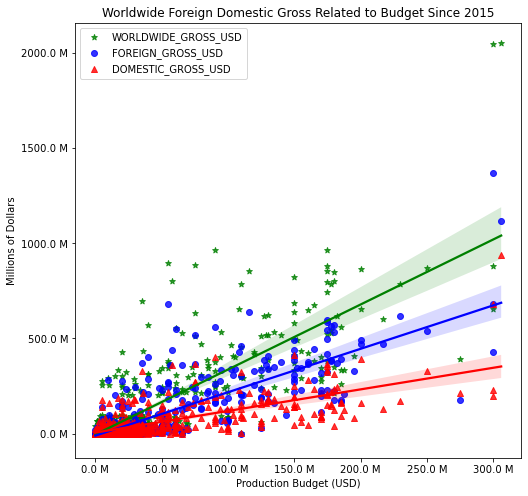

In [28]:
# 'Worldwide & Domestic Gross Related to Production Budget',

# set up figure convert to millions
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, ax = plt.subplots(figsize=(8,8), sharey=True)


# green dots/line will be ww gross as a function of production_budget
ax1 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='WORLDWIDE_GROSS_USD', color='green',marker='*', label='WORLDWIDE_GROSS_USD')

# blue dots/line will be foreign_gross gross as a function of production_budget
ax2 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='FOREIGN_GROSS_USD', color='blue',marker='o', label='FOREIGN_GROSS_USD')

# red dots/line will be domestic_gross as a function of production_budget
ax2 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='DOMESTIC_GROSS_USD', color='red',marker='^', label='DOMESTIC_GROSS_USD')



# include a legend
ax.legend()

# set title and axis labels
ax.set(title='Worldwide Foreign Domestic Gross Related to Budget Since 2015',
      xlabel='Production Budget (USD)',
      ylabel = 'Millions of Dollars')

ax.xaxis.set_major_formatter(million_formatter)
ax.yaxis.set_major_formatter(million_formatter)



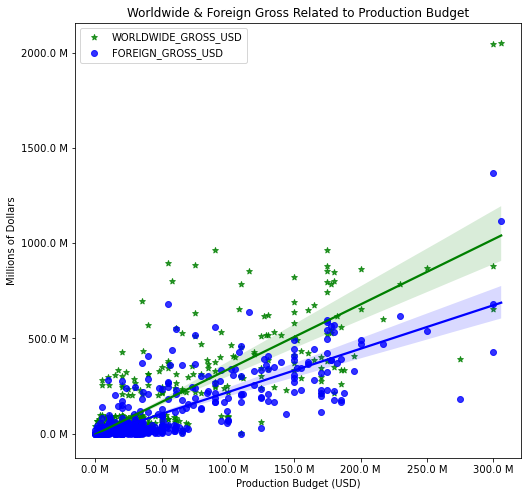

In [29]:
# set up figure convert to millions
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, ax = plt.subplots(figsize=(8,8), sharey=True)

# green dots/line will be ww_gross as a function of production_budget
ax1 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='WORLDWIDE_GROSS_USD', color='green',marker='*', label='WORLDWIDE_GROSS_USD')

# blue dots/line will be foreign_gross as a function of production_budget
ax2 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='FOREIGN_GROSS_USD', color='blue', marker='o', label='FOREIGN_GROSS_USD')






# include a legend
ax.legend()

# set title and axis labels
ax.set(title='Worldwide & Foreign Gross Related to Production Budget',
      xlabel='Production Budget (USD)',
      ylabel = 'Millions of Dollars')

ax.xaxis.set_major_formatter(million_formatter)
ax.yaxis.set_major_formatter(million_formatter)


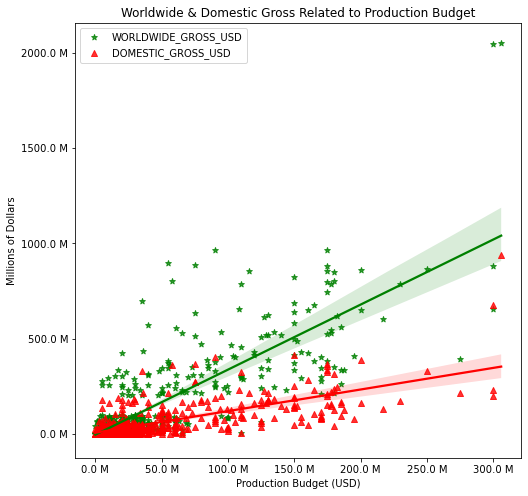

In [30]:
# set up figure convert to millions
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, ax = plt.subplots(figsize=(8,8), sharey=True)

# green dots/line will be ww_gross as a function of production_budget
ax1 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='WORLDWIDE_GROSS_USD', color='green',marker='*', label='WORLDWIDE_GROSS_USD')


# red dots/line will be domestic_gross as a function of production_budget
ax2 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='DOMESTIC_GROSS_USD', color='red',marker='^', label='DOMESTIC_GROSS_USD')




# include a legend
ax.legend()

# set title and axis labels
ax.set(title='Worldwide & Domestic Gross Related to Production Budget',
      xlabel='Production Budget (USD)',
      ylabel = 'Millions of Dollars')

ax.xaxis.set_major_formatter(million_formatter)
ax.yaxis.set_major_formatter(million_formatter)

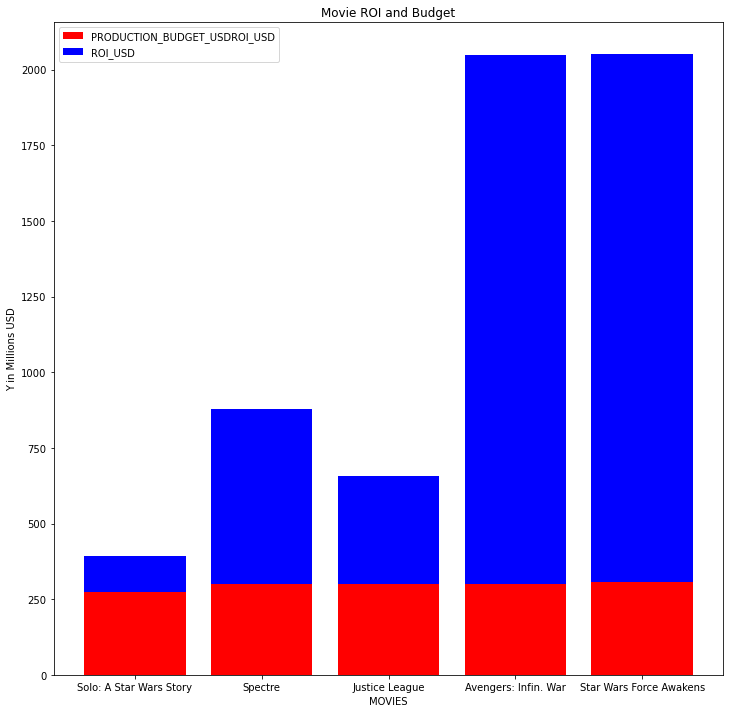

In [31]:
plt.figure(figsize=(12,12))
x = ["Solo: A Star Wars Story", "Spectre", "Justice League", "Avengers: Infin. War","Star Wars Force Awakens"]

ROI_USD = [118.1513, 579.6209, 355.9452, 1748.134, 1747.311] 
PRODUCTION_BUDGET_USD = [275., 300., 300., 300., 306.] 


plt.bar(x,PRODUCTION_BUDGET_USD, color = 'r', label="PRODUCTION_BUDGET_USDROI_USD")
plt.bar(x,ROI_USD,bottom=PRODUCTION_BUDGET_USD, color = 'b', label="ROI_USD")


    
plt.xlabel("MOVIES")
plt.ylabel("Y in Millions USD")
plt.title("Movie ROI and Budget")
plt.legend(loc="upper left")



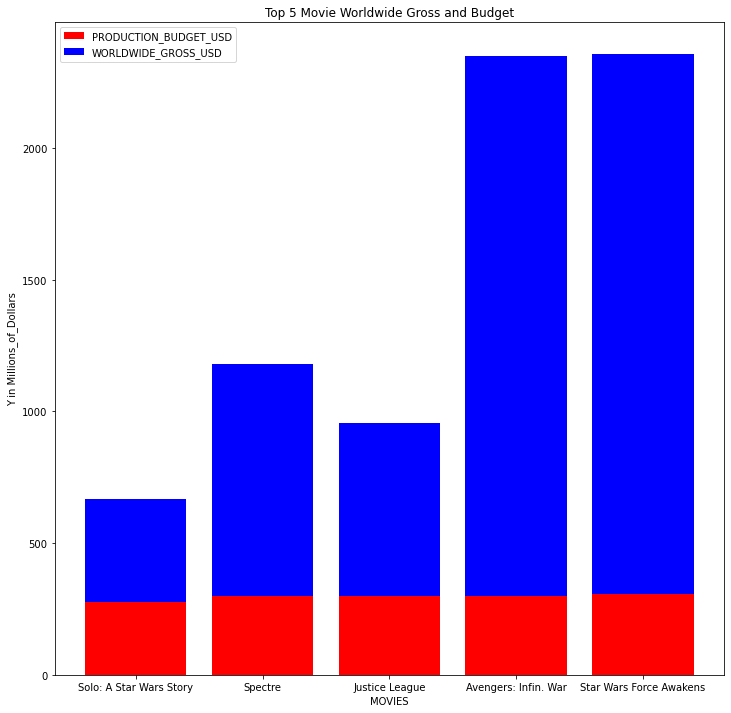

In [32]:

plt.figure(figsize=(12,12))
x = ["Solo: A Star Wars Story", "Spectre", "Justice League", "Avengers: Infin. War","Star Wars Force Awakens"]
 
PRODUCTION_BUDGET_USD = [275., 300., 300., 300., 306.] 
WORLDWIDE_GROSS_USD = [393.1513, 879.6209, 655.9452, 2048.1342, 2053.3112]


plt.bar(x,PRODUCTION_BUDGET_USD,color = 'r', label="PRODUCTION_BUDGET_USD")
plt.bar(x,WORLDWIDE_GROSS_USD,bottom=PRODUCTION_BUDGET_USD, color = 'b', label="WORLDWIDE_GROSS_USD")


    
plt.xlabel("MOVIES")
plt.ylabel("Y in Millions_of_Dollars")
plt.title("Top 5 Movie Worldwide Gross and Budget")
plt.legend(loc="upper left")

Text(0.5, 1.0, 'Top 5 Movie DOMESTIC GROSS and FOREIGN GROSS COMPARSION')

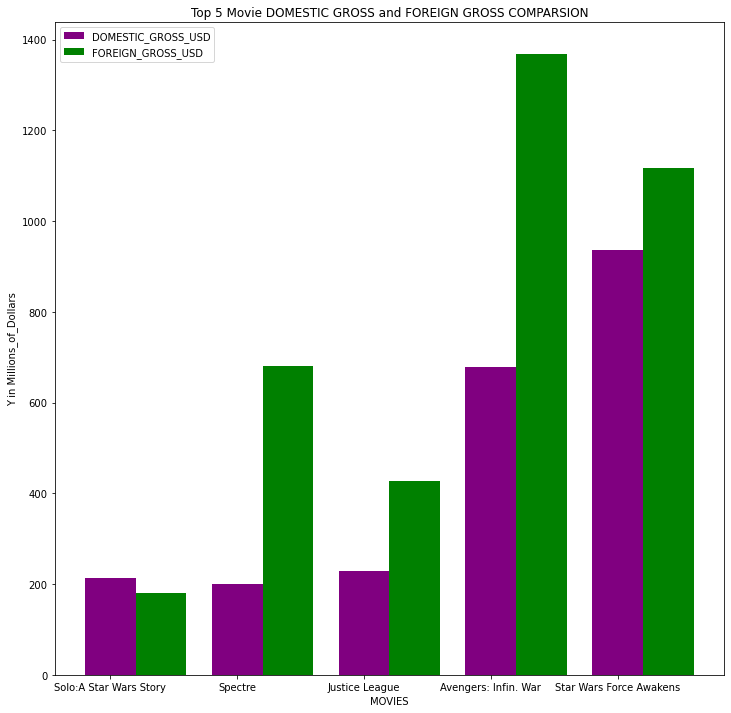

In [33]:
plt.figure(figsize=(12,12))



w=0.4
x = ["Solo:A Star Wars Story", "Spectre", "Justice League", "Avengers: Infin. War","Star Wars Force Awakens"]
DOMESTIC_GROSS_USD =  [213.7675, 200.0742, 229.0243, 678.8155, 936.6622, ]
FOREIGN_GROSS_USD =  [179.3838, 679.5467, 426.9209, 1369.3187, 1116.6490 ]

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1,DOMESTIC_GROSS_USD,w, color = 'purple', label="DOMESTIC_GROSS_USD")
plt.bar(bar2,FOREIGN_GROSS_USD,w, color = 'g', label="FOREIGN_GROSS_USD")

plt.xticks(bar1,x)
plt.legend()
plt.xlabel("MOVIES")
plt.ylabel("Y in Millions_of_Dollars")
plt.title("Top 5 Movie DOMESTIC GROSS and FOREIGN GROSS COMPARSION")

# Recommendation engineered dataframes



In [34]:
#researched google to obtain data and facts to engineer a dictinary and transform into a dataframe
bond_series = {'Bond_Film_Series_Lead_Role_Daniel C.' : ['Casino Royale','Quantum of Solace', 'Skyfall','Spectre', 'No Time to Die'],
    'Daniel_C._Bond_Series_Earnings' : ['$3,200,000', '$7,200,000', '$17,000,000', '$30,000,000', '$85,000,000'],
    'Worldwide_gross_Bond_Series' : ['$594,420,283', '$591,692,078', '$1,110,526,981', '$879,500,760', '$760,839,661']
              }
bond_series = pd.DataFrame(bond_series)
bond_series.head(5)

,Bond_Film_Series_Lead_Role_Daniel C.,Daniel_C._Bond_Series_Earnings,Worldwide_gross_Bond_Series
0,Casino Royale,"$3,200,000","$594,420,283"
1,Quantum of Solace,"$7,200,000","$591,692,078"
2,Skyfall,"$17,000,000","$1,110,526,981"
3,Spectre,"$30,000,000","$879,500,760"
4,No Time to Die,"$85,000,000","$760,839,661"


In [35]:
#researched google to obtain data and facts to engineer a dictinary and transform into a dataframe
highest_all_time = {
    'Film_Series' : ['Marvel Series', 'Star Wars', 'Harry Potter', 'Spider-Man', 'James Bond'],
    'Highest_Series_Gross_AllTime' :['$22.6 Billion', '$10.3 Billion','$9.2 Billion','$7.2 Billion','$7.1 Billion'],
    'Film_Distributors' : ['Walt Disney', 'Walt Disney', 'Warner Bros', 'Sony Pictures', 'Sony Pictures'],
    'Series Established' : ['2008', '1977', '2000', '2002', '1962'],
    'Number of Movies' : ['12', '28', '8', '9', '27'],
    'Number of Books' : ['64','40', '7','575', '12'],
    'Production_years' : ['14', '45', '22', '20', '60']
}

highest_all_time = pd.DataFrame(highest_all_time)
highest_all_time.head(5)

,Film_Series,Highest_Series_Gross_AllTime,Film_Distributors,Series Established,Number of Movies,Number of Books,Production_years
0,Marvel Series,$22.6 Billion,Walt Disney,2008,12,64,14
1,Star Wars,$10.3 Billion,Walt Disney,1977,28,40,45
2,Harry Potter,$9.2 Billion,Warner Bros,2000,8,7,22
3,Spider-Man,$7.2 Billion,Sony Pictures,2002,9,575,20
4,James Bond,$7.1 Billion,Sony Pictures,1962,27,12,60


In [36]:
#Convert Number of movies to an int and created new column Movie #
highest_all_time['Movie_#'] = highest_all_time['Number of Movies'].astype(np.int64)
highest_all_time['P_year'] = highest_all_time['Production_years'].astype(np.int64)
highest_all_time

,Film_Series,Highest_Series_Gross_AllTime,Film_Distributors,Series Established,Number of Movies,Number of Books,Production_years,Movie_#,P_year
0,Marvel Series,$22.6 Billion,Walt Disney,2008,12,64,14,12,14
1,Star Wars,$10.3 Billion,Walt Disney,1977,28,40,45,28,45
2,Harry Potter,$9.2 Billion,Warner Bros,2000,8,7,22,8,22
3,Spider-Man,$7.2 Billion,Sony Pictures,2002,9,575,20,9,20
4,James Bond,$7.1 Billion,Sony Pictures,1962,27,12,60,27,60


In [37]:
# mean of how many production years 
Production_yr_mean = highest_all_time['P_year'].mean()
Production_yr_mean

32.2

# Recommendation Visuals



Text(-20, 120, 'Mean')

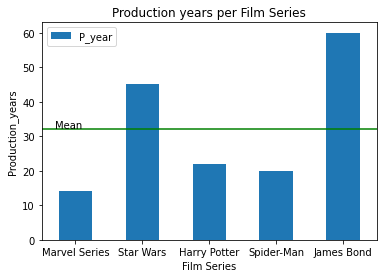

In [38]:
#bar chart 
highest_all_time.plot.bar(x='Film_Series', y='P_year', rot=0)
plt.xlabel("Film Series")
plt.ylabel("Production_years")
plt.title("Production years per Film Series")
plt.legend(loc="upper left")
plt.axhline(y = Production_yr_mean, color = 'g')

plt.annotate('Mean',
            xy=(.1,0), xycoords='axes fraction',
            xytext=(-20, 120), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='top')

In [39]:
# mean of how many movies made 
Movie_M = highest_all_time['Movie_#'].mean()
Movie_M

16.8

Text(-20, 120, 'Mean')

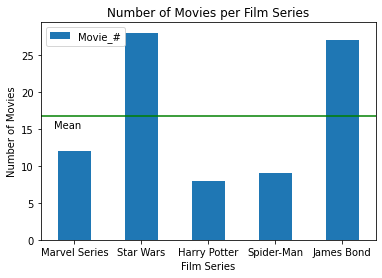

In [40]:

#bar chart
highest_all_time.plot.bar(x='Film_Series', y='Movie_#', rot=0)
plt.xlabel("Film Series")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Film Series")
plt.legend(loc="upper left")
plt.axhline(y = Movie_M, color = 'g')

plt.annotate('Mean',
            xy=(.1,0), xycoords='axes fraction',
            xytext=(-20, 120), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='top')



# Evaluation 

Conclusion 